# Non-Linearity

The scale at which structure formation becomes non-linear when the dimensionless power spectrum reaches $1.68^2$. Any scales smaller than this cannot be reliably used to obtain constraints.

1. Find the wavenumber for which

    $\Delta^2(k_{NL};z) = 1.68^2$


2. Compute the corresponding multipole

    $\ell_{NL}(z) = k_{NL}(z) D_A(z)$
    
It is also worth noting that LSST will only probe up to $\ell = 3000$. Therefore, if the $\ell_{NL} > 3000$ then the non-linearity is inconsequential. Also, at some redshifts the power spectrum simply does not reach the threshold for non-linear growth. These redshifts have been set to have $\ell_{NL} = 0$ to denote that the non-linear scale does not exist.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex = True)

%run Cosmology.ipynb

# redshift parameters
zmax = 3.5
numz = 301
dz = zmax/(numz-1.)
zlist = np.arange(0,zmax+0.01,dz)
# compute angular diameter distance from Cosmology
da = np.reshape(d_a(z),(1,1,1,numz))

# dimensionless power spectrum
k = np.load('../data2/k.npy')[:,:,:,::-1]
pk = np.load('../data2/pk.npy')[:,:,:,::-1]
pk_dimless = (pk*np.power(k,3.0))/(2.0*np.square(np.pi))

# find non-linear wavenumber
knl = []
# parameter dimension
for i in range(5):
    print(i+1,'/5')
    h1 = []
    # parameter value dimension
    for j in range(11):
        h2 = []
        # axion mass dimension
        for e in range(9):
            h3 = []
            # redshift dimension
            for y in range(numz):
                h4 = []
                # wavenumber dimension
                for s in range(660):
                    if pk_dimless[i][j][e][y][s] >= np.square(1.68):
                        h4.append(k[i][j][e][y][s])
                if len(h4) == 0:
                    # much larger than the survey cutoff
                    h3.append(100000)
                else:
                    h3.append(h4[0])
            h2.append(h3)
        h1.append(h2)
    knl.append(h1)

# convert to non-linear multipole
lnl = knl*da
np.save('non_linear.npy',lnl)

(5, 11, 9, 301, 660)


bounds of z-bins [0.15, 0.45, 0.93, 1.56, 2.39, 3.5]
average z of z-bins [0.3, 0.69, 1.25, 1.98, 2.94]


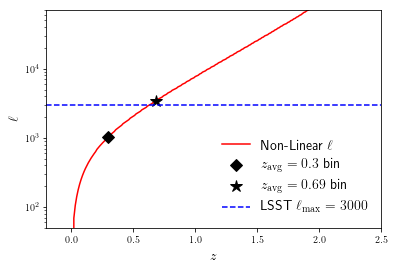

In [2]:
%run Window_Functions.ipynb

lnl = np.load('Data/non_linear.npy')
plt.plot(zlist,lnl[0][0][4],'r',label = r'Non-Linear $\ell$')
plt.plot(zavg[0],np.interp(zavg[0],zlist,lnl[2][10][8]),'kD',markersize = 9,label = r'$z_{\rm avg} = %s$ bin'%(zavg[0]))
plt.plot(zavg[1],np.interp(zavg[1],zlist,lnl[2][10][8]),'k*',markersize = 12,label = r'$z_{\rm avg} = %s$ bin'%(zavg[1]))
plt.axhline(3000,color = 'blue',linestyle = 'dashed',label = r'LSST $\ell_{\rm max} = 3000$')
plt.ylim(50,100000)
plt.xlim(-0.2,2.5)
plt.yscale('log')
plt.xlabel(r'$z$',size = 14)
plt.ylabel(r'$\ell$',size = 14)
#plt.title(r'Multipole at Which $P(\ell,z)$ Becomes Non-Linear',size = 15)
plt.legend(frameon = False,loc = 'lower right',fontsize = 14)
plt.ylim(50,70000)
# plt.savefig('non_linear.pdf')
plt.show()
plt.close('all')